In [1]:
import csv
import numpy as np

def load_iris():
    fh = open("data/iris.data", 'r')
    csv_fh = csv.reader(fh)
    
    header = csv_fh.next()
    data = []
    for row in csv_fh:
        data.append(row)
    
    data = np.array(data)
        
    X = data[:, 0:4].astype(np.float)
    y = data[:, -1]
    
    d = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
    
    y2 = np.array( map(lambda x: d[x], y) )
    
    return(X, y2, header)

In [2]:
X, y, header = load_iris()

In [3]:
dims = [2, 3]
A = X[:, dims]

In [4]:
indices = range(150)

np.random.seed(seed=0)
np.random.shuffle(indices)

train_indices = indices[:120]
test_indices = indices[120:]

X_train = A[train_indices]
y_train = y[train_indices]

X_test = A[test_indices]
y_test = y[test_indices]

In [5]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)

clf = clf.fit(X_train, y_train)

In [6]:
clf.predict(X_test)

array([0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 2, 0, 1, 2, 2, 0, 1, 1, 2, 1,
       0, 0, 0, 2, 1, 2, 0])

In [7]:
y_test

array([0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1,
       0, 0, 0, 2, 1, 2, 0])

In [8]:
clf.score(X_test, y_test)

0.93333333333333335

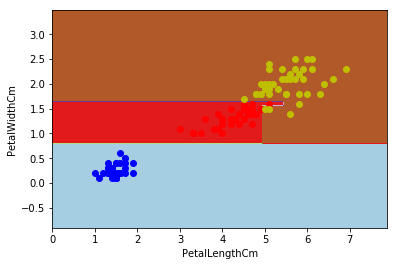

In [9]:
from plot_decision_boundary import plot_decision_boundary
import matplotlib.pyplot as plt

plot_decision_boundary(X_train, y_train, header, dims,
                      ['setosa', 'versicolor', 'virginica'],
                      clf)

plt.show()

0.633333333333
0.933333333333
0.933333333333
0.933333333333


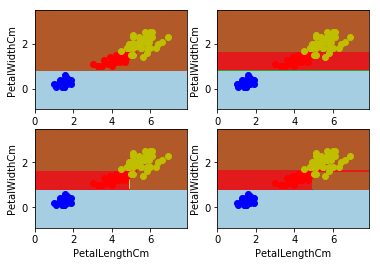

In [10]:
classifiers = [
    DecisionTreeClassifier(random_state=0, max_depth=1),
    DecisionTreeClassifier(random_state=0, max_depth=2),
    DecisionTreeClassifier(random_state=0, max_depth=3),
    DecisionTreeClassifier(random_state=0, max_depth=4)
]

for i, clf in enumerate(classifiers):
    clf = clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))
    plt.subplot(2, 2, i + 1)
    plot_decision_boundary(X_train, y_train, header, dims,
                      ['setosa', 'versicolor', 'virginica'],
                      clf)

plt.show()